## M6 - W6 Assignment: Time Series Analysis
#### Luke Barry

In [1]:
import pandas as pd
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
from prophet import Prophet
# import fbprophet
# Prophet = fbprophet.Prophet
import datetime as dt

***

## Column Info

**Stores**:  Anonymized information about the 45 stores, indicating the type and size of store

**Features**: Contains additional data related to the store, department, and regional activity for the given dates.

Store - the store number

Date - the week

Temperature - average temperature in the region

Fuel_Price - cost of fuel in the region

MarkDown1-5 - anonymized data related to promotional markdowns. *`MarkDown data is only available after Nov 2011, and is not available for all stores all the time`*. Any missing value is marked with an NA

CPI - the consumer price index

Unemployment - the unemployment rate

IsHoliday - whether the week is a special holiday week

**Sales**:  Historical sales data, which covers to *`2010-02-05 to 2012-11-01`*. Within this tab you will find the following fields:

Store - the store number

Dept - the department number

Date - the week

Weekly_Sales -  sales for the given department in the given store

IsHoliday - whether the week is a special holiday week

***

## Inspect, Merge and Clean Data

In [2]:
features = pd.read_csv('Features data set.csv')
sales = pd.read_csv('sales data-set.csv')
stores = pd.read_csv('stores data-set.csv')
for i in [features, sales, stores]:
    print(i.sample(3))
    print('\n')
    print(i.info())
    print('\n')

      Store        Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  \
4379     25  23/04/2010        46.12       2.902        NaN        NaN   
4643     26  18/11/2011        37.78       3.571    5590.39     226.18   
3429     19  11/01/2013        34.91       3.802    4034.60   20543.56   

      MarkDown3  MarkDown4  MarkDown5         CPI  Unemployment  IsHoliday  
4379        NaN        NaN        NaN  203.690559         7.856      False  
4643      61.08     345.45    4332.53  136.466667         7.598      False  
3429      16.34      27.73    4608.97  138.607903         8.036      False  


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-

In [3]:
# Merging data frames on common columns
merge=pd.merge(sales,features, on=['Store','Date', 'IsHoliday'], how='left')
df=pd.merge(merge,stores, on=['Store'], how='left')
df.sample(3)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
280644,29,27,22/04/2011,1247.84,False,47.76,3.919,NaN,NaN,NaN,NaN,NaN,134.357100,9.966,B,93638
298595,31,36,31/12/2010,726.00,True,47.19,2.943,NaN,NaN,NaN,NaN,NaN,211.064774,8.163,A,203750
69834,8,8,17/06/2011,24296.40,False,84.73,3.637,NaN,NaN,NaN,NaN,NaN,218.402145,6.297,A,155078


In [4]:
# Inspecting New df
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
 5   Temperature   421570 non-null  float64
 6   Fuel_Price    421570 non-null  float64
 7   MarkDown1     150681 non-null  float64
 8   MarkDown2     111248 non-null  float64
 9   MarkDown3     137091 non-null  float64
 10  MarkDown4     134967 non-null  float64
 11  MarkDown5     151432 non-null  float64
 12  CPI           421570 non-null  float64
 13  Unemployment  421570 non-null  float64
 14  Type          421570 non-null  object 
 15  Size          421570 non-null  int64  
dtypes: bool(1), float64(10), int64(3), object(2)
memory usage: 51.9+ MB


In [5]:
# converting to datetime
df['Date'] = pd.to_datetime(df['Date'])
df.Date.sample(10)

299178   2011-03-18
119308   2012-07-27
245274   2011-04-15
319729   2011-11-03
47406    2012-07-20
14085    2010-04-16
121523   2011-02-09
86039    2011-03-25
195107   2011-08-04
138195   2011-07-15
Name: Date, dtype: datetime64[ns]

In [6]:
#checking for duplicates
df.duplicated().sum()

0

In [7]:
# Replacing Markdown columns na values with their means
for i in df:
    if df[i].isna().sum().sum() != 0:
        df[i].fillna(df[i].mean(), inplace=True)
    print(df[i].isna().sum().sum())

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


***

## Data Exploration

In [8]:
# # Let's continue cleaning the data by converting the categorical columns to integers
# # We will use the Label Encoder from sklearn to help with that:

# # Prep: Load the Labelencoder and copythe Dataframe
# le = LabelEncoder()

# # Collect all categorical columns that need to be transformed 
# catcolumn = ["Type"]

# # Iterate over each, create an array with the labelencoder and store it as new column in the copied dataframe
# for k in catcolumn:
#     df[k] = le.fit_transform(df[k])

# df.info()

In [9]:
df['Type'].astype('category').cat.codes

0         0
1         0
2         0
3         0
4         0
         ..
421565    1
421566    1
421567    1
421568    1
421569    1
Length: 421570, dtype: int8

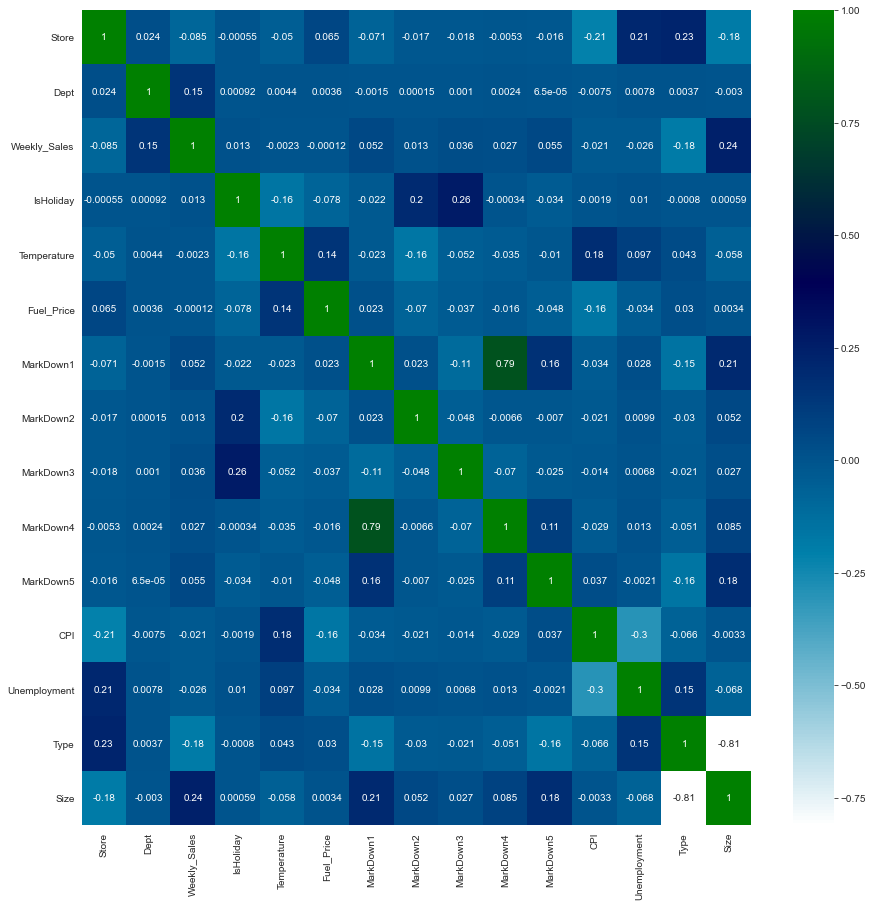

In [10]:
# Heatmap
plt.figure(figsize=(15, 15))
df_corr = df.copy()
df_corr['Type'] = df['Type'].astype('category').cat.codes
sns.heatmap(pd.DataFrame(df_corr).corr(), cmap="ocean_r", annot=True)
plt.show()

> It can be noted that Weekly Sales has a correlation higher than 0.05 with Dept, Markdowns 1, 2, and 3, Size, and Type.

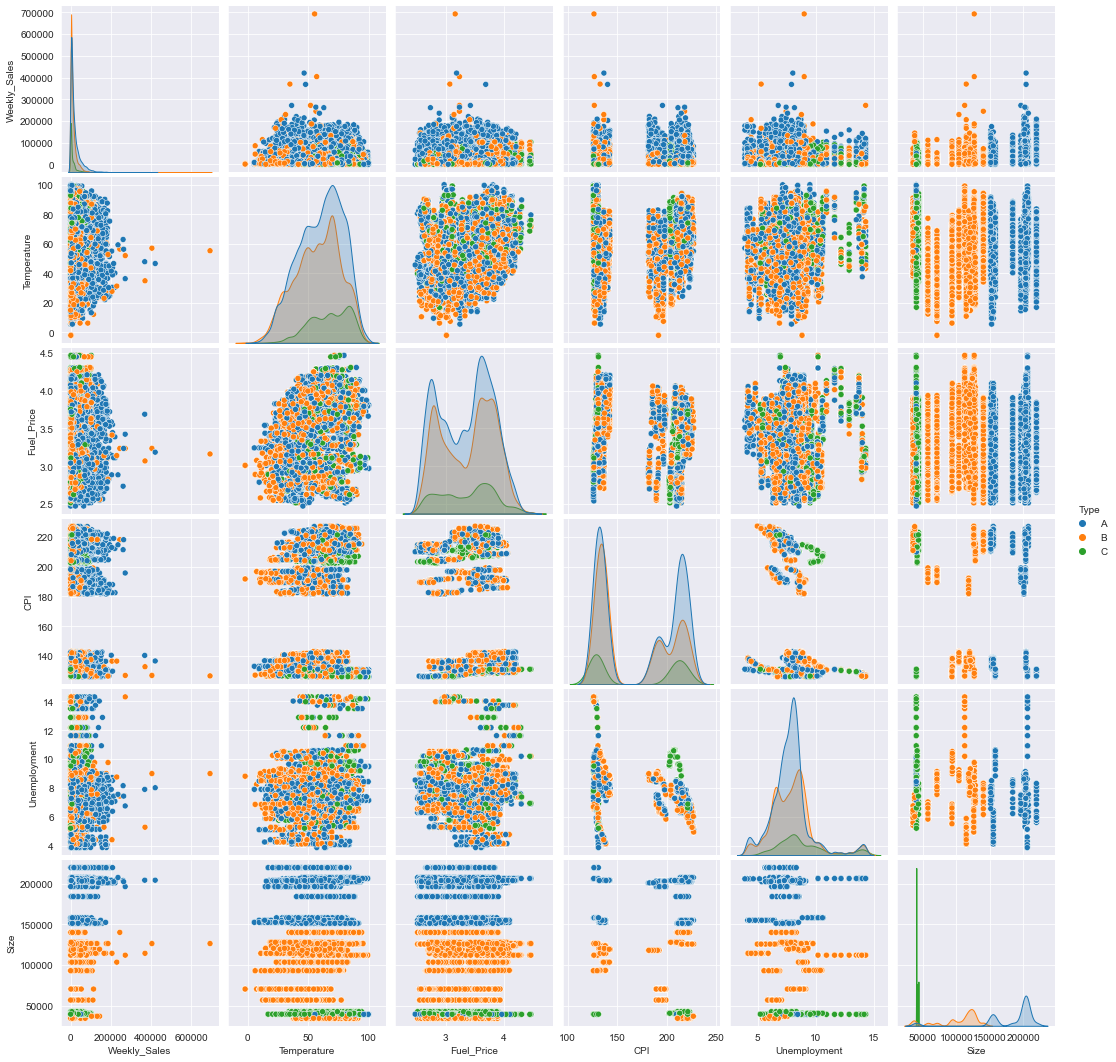

In [11]:
# Exploring pairs
# I use a sample of the data since a pairplot with the full dataset would take too long to load.
sns.pairplot(df[['Date', 'Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Type', 'Size']].sample(frac=.1), hue='Type')
plt.show()

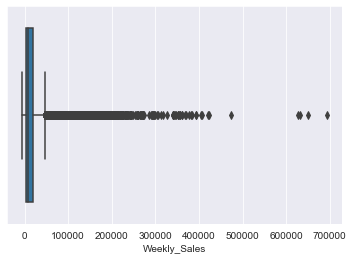

In [12]:
# Weekly Sales Box Plot
sns.boxplot(x='Weekly_Sales', data=df)
plt.show()

In [13]:
# Weekly Sales Description
df.Weekly_Sales.describe()

count    421570.000000
mean      15981.258123
std       22711.183519
min       -4988.940000
25%        2079.650000
50%        7612.030000
75%       20205.852500
max      693099.360000
Name: Weekly_Sales, dtype: float64

> Looks like there may a few outliers in our target column - Weekly_Sales. Let's take a look at what the cause could be.

***

## Weekly Sales Visualizations
> This sections takes a closer look at the target column's relationship with other columns.

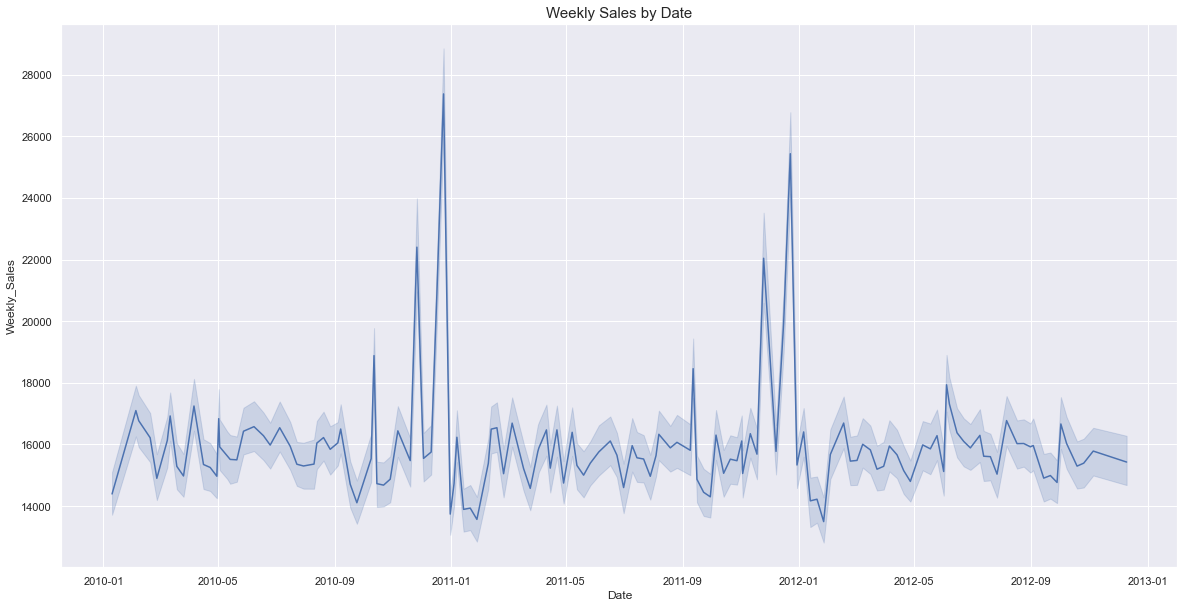

In [14]:
# Weekly by Date
sns.set(rc={'figure.figsize':(20, 10)})
sns.lineplot(x='Date', y='Weekly_Sales', data=df)
plt.title('Weekly Sales by Date', fontsize=15)
plt.show()

> There appears to be a clear increase in sales around christmas time followed by a sharp drop off inin January. There is also a spike in fall, likely for back to school/halloween shoppers. 

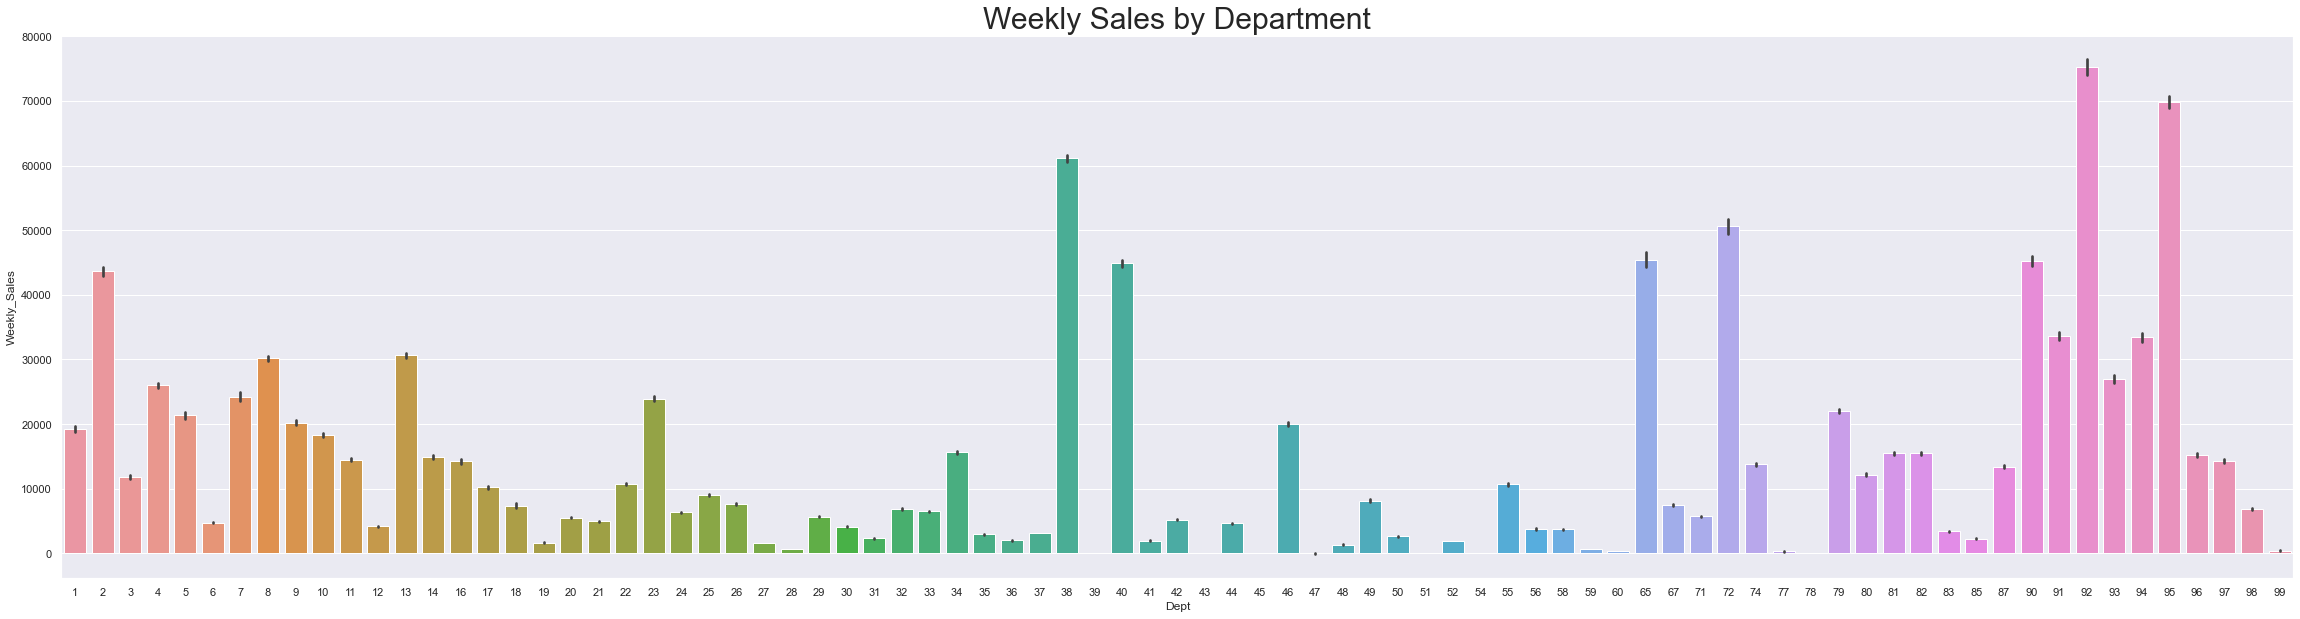

In [15]:
# Weekly by Dept
sns.set(rc={'figure.figsize':(40, 10)})
sns.barplot(x='Dept', y='Weekly_Sales', data=df)
plt.title('Weekly Sales by Department', fontsize=30)
plt.show()

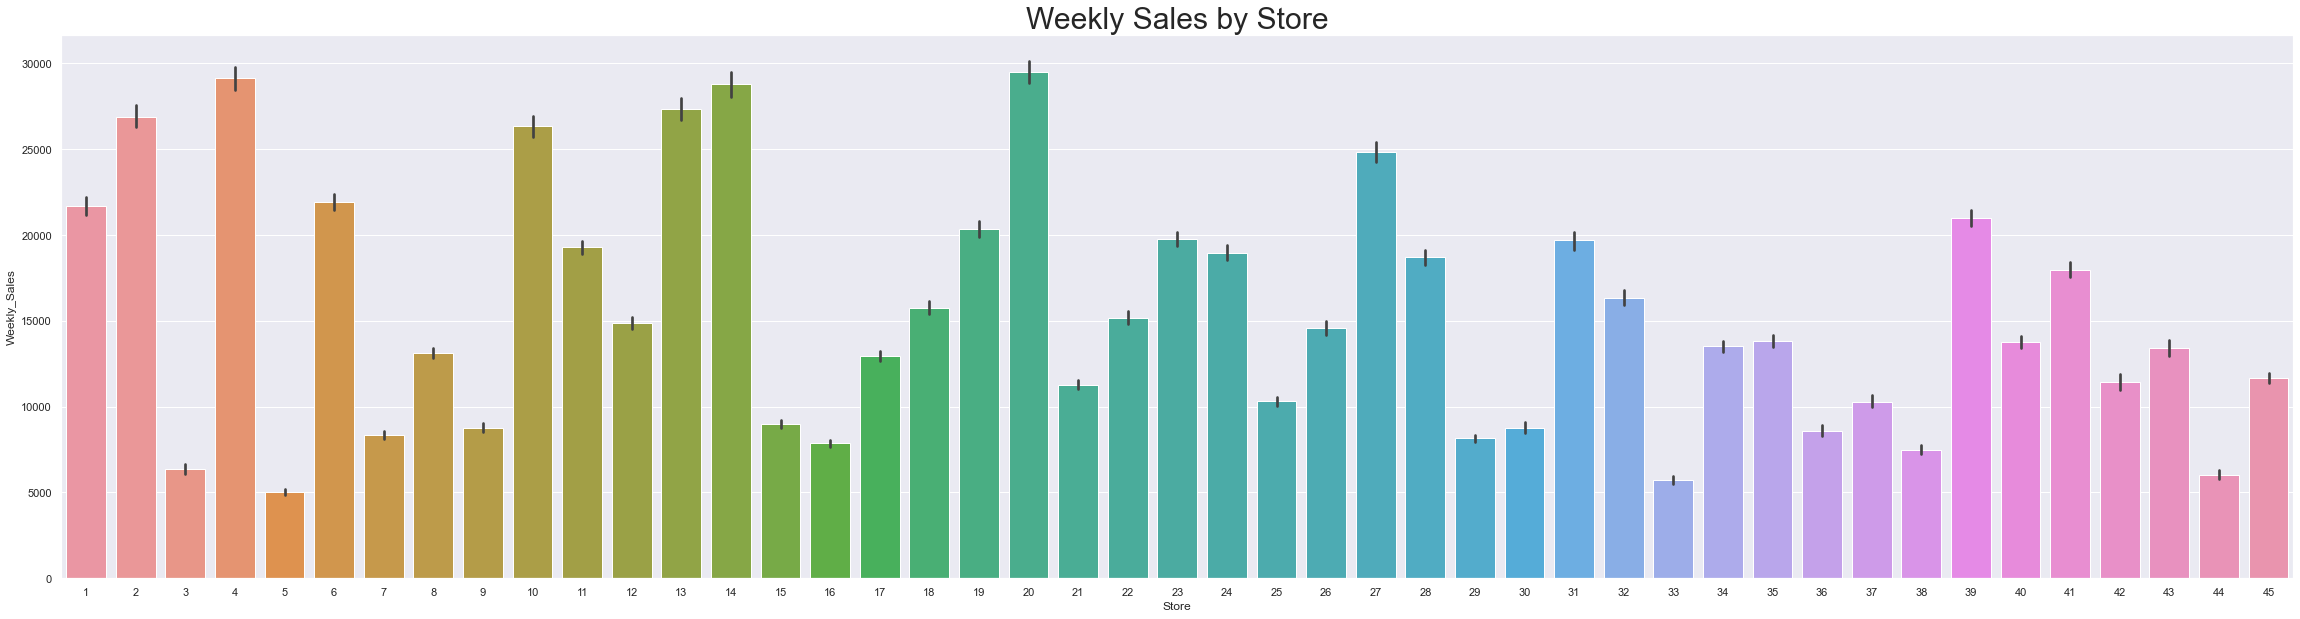

In [16]:
# Weekly by Store
sns.barplot(x='Store', y='Weekly_Sales', data=df)
plt.title('Weekly Sales by Store', fontsize=30)
plt.show()

> It should be noted that these sales are likely highly influenced by size more than the relative performance of the store, as size has the highest correlation with Weekly Sales out of any other column (0.24).

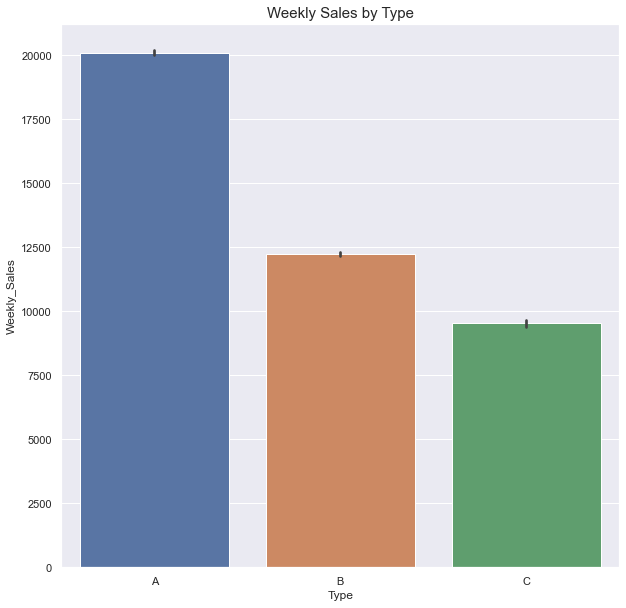

In [17]:
# Weekly by Type
sns.set(rc={'figure.figsize':(10, 10)})
sns.barplot(x='Type', y='Weekly_Sales', data=df)
plt.title('Weekly Sales by Type', fontsize=15)
plt.show()

> Type and size are very correlated (-.81), so the types are almost certainly a reflection of the size. Therefore, it makes sense for weekly sales to be higher in a larger store.

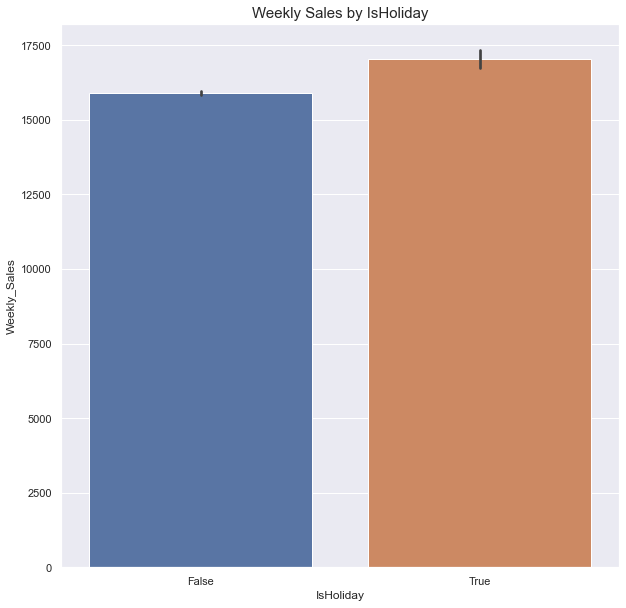

In [18]:
# Weekly by IsHoliday
sns.set(rc={'figure.figsize':(10, 10)})
sns.barplot(x='IsHoliday', y='Weekly_Sales', data=df)
plt.title('Weekly Sales by IsHoliday', fontsize=15)
plt.show()

In [19]:
# Putting Holiday Sales in perspective
df.IsHoliday.value_counts()

False    391909
True      29661
Name: IsHoliday, dtype: int64

> The Weekly Sales by IsHoliday graph further supports the observation that there is a large increase of weekly sales during holidays. This accounts for the outlier found in the weekly sales column earlier.

***

## Inspecting Other Columns
> This section will take a closer look at the other columns

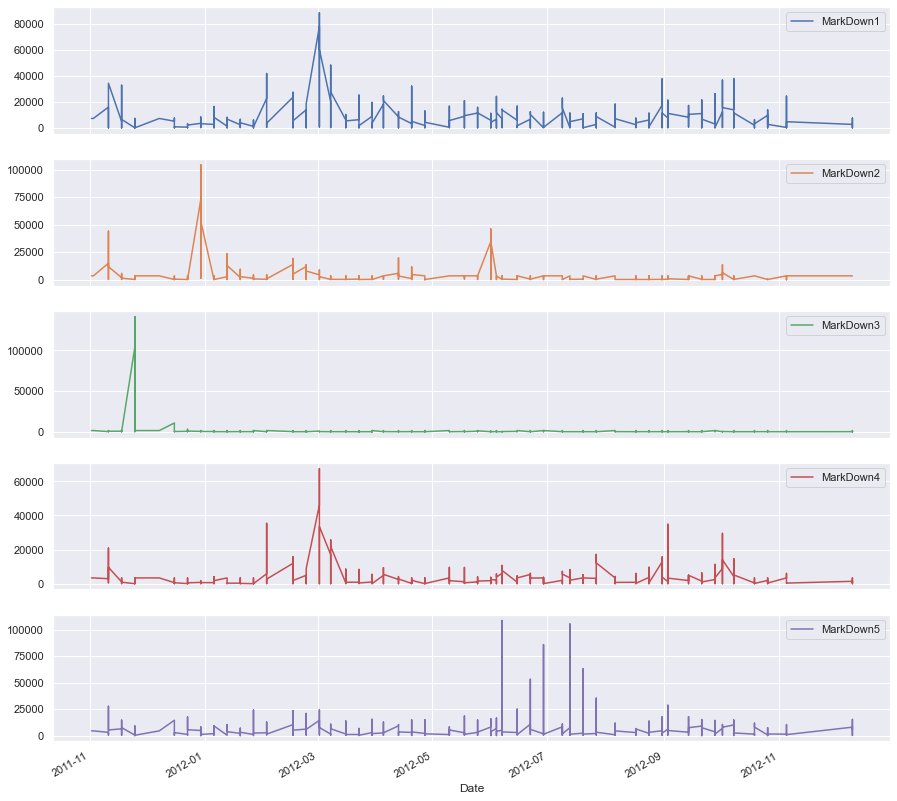

In [20]:
# Visualizing markdowns on a weekly basis
# Markdowns are separated since the columns have no data from before November 2011
df[['Date', 'MarkDown1', 'MarkDown2', 'MarkDown3', 
    'MarkDown4', 'MarkDown5']][df['Date'] > '2011-11-01'].plot(x='Date', subplots=True, figsize=(15,15))
plt.show()

> The graphs give a better idea of the seasonality of each markdowns.

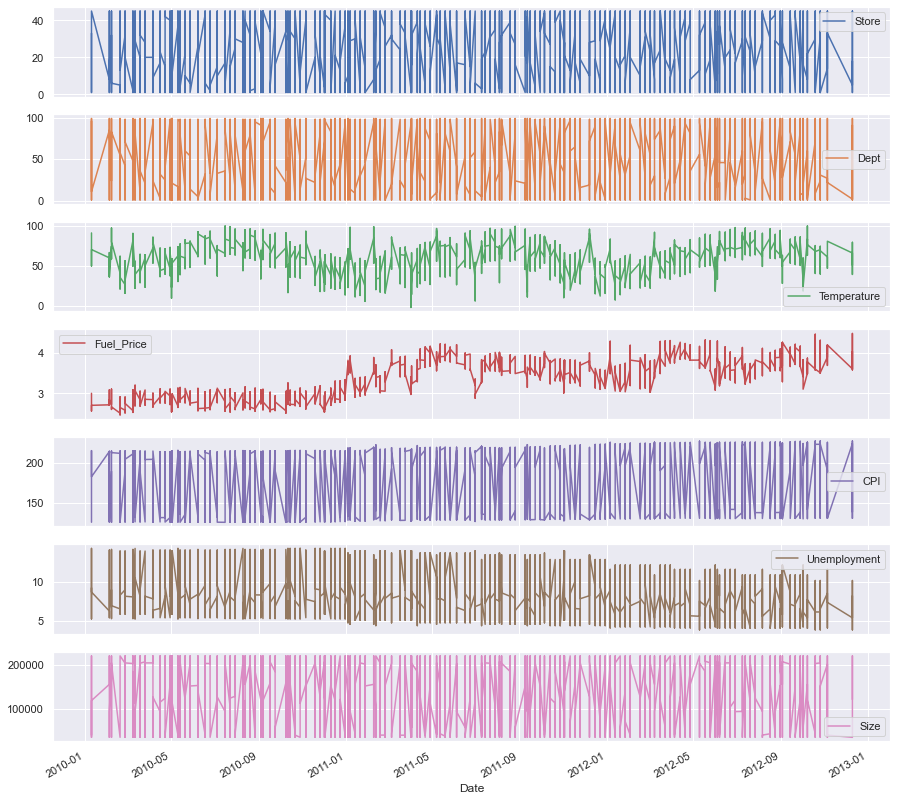

In [21]:
# Visualizing others
df.drop(['IsHoliday', 'Weekly_Sales', 'MarkDown1', 'MarkDown2', 
         'MarkDown3', 'MarkDown4', 'MarkDown5'], axis=1).plot(x='Date', subplots=True, figsize=(15,15))
plt.show()

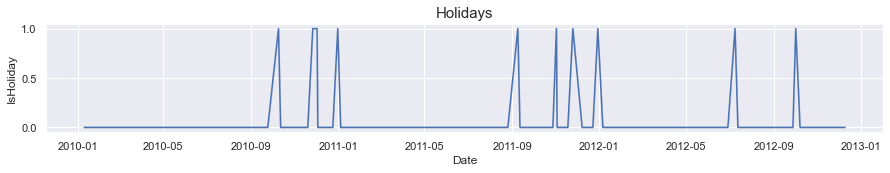

In [22]:
# IsHoliday
sns.set(rc={'figure.figsize':(15, 2)})
sns.lineplot(x='Date', y='IsHoliday', data=df)
plt.title('Holidays', fontsize=15)
plt.show()

***

## Predicting Future Weekly Sales
> Since the stores vary in type and each type may have different needs, it makes sense to make forecasts for each type.

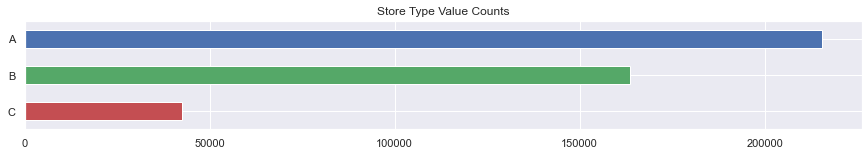

In [23]:
# Inspecting how many stores belong to each type
df.Type.value_counts().sort_values().plot(kind='barh', color=['r', 'g', 'b'])
plt.title('Store Type Value Counts')
plt.show()

In [24]:
# Defining function for forecasting model
def forecast_model(store_type):
    print('Models for Store: ', store_type, '\n')
    
    """
    This function forecasts future sales for an additional 105 weeks on top of the given data.
    
    ###
    INPUT:
    Store Type (A, B, or C)
    
    ###
    RETURNS:
    Component plots and a plot comparing previous and prediction data.
    
    """
    
    # Prep for Prophet
    
    # Grouping by weekly to make graph more readable
    df_prophet=df[df['Type'] == store_type].groupby(by=['Date'], as_index=False)['Weekly_Sales'].sum()

    # Renaming Date/Target Columns
    df_prophet = df_prophet.rename(columns = {'Date':'ds', 'Weekly_Sales':'y'})

    # Defining the model
    model = Prophet()

    # Fitting the model
    model.fit(df_prophet)
    
    # Future Dates
    future = model.make_future_dataframe(periods=105, freq="w")

    # Separate future dates
    future_dates = future[future['ds'] > df['Date'].max()]

    # Creating prediction data
    forecast = model.predict(future_dates)

    # Plotting the components
    model.plot_components(forecast)

    # Plotting the model along side past data
    model.plot(forecast)
    plt.plot(df_prophet.ds, df_prophet.y)
    plt.show()

Models for Store:  A 



INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


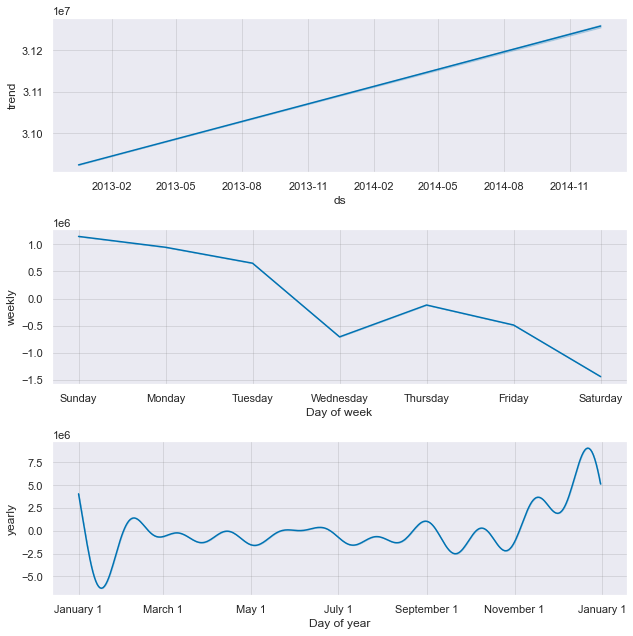

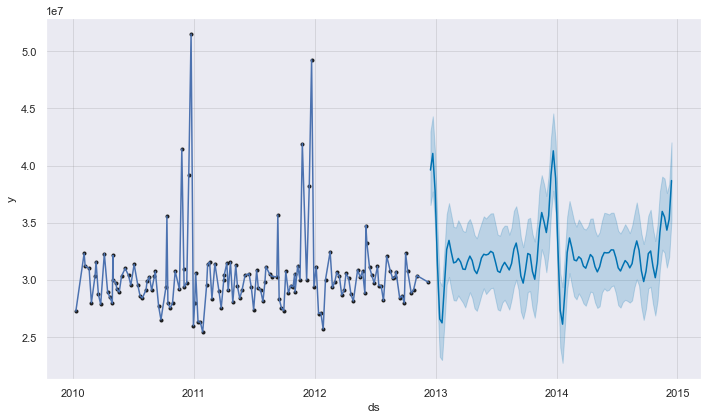

In [25]:
forecast_model('A')

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Models for Store:  B 



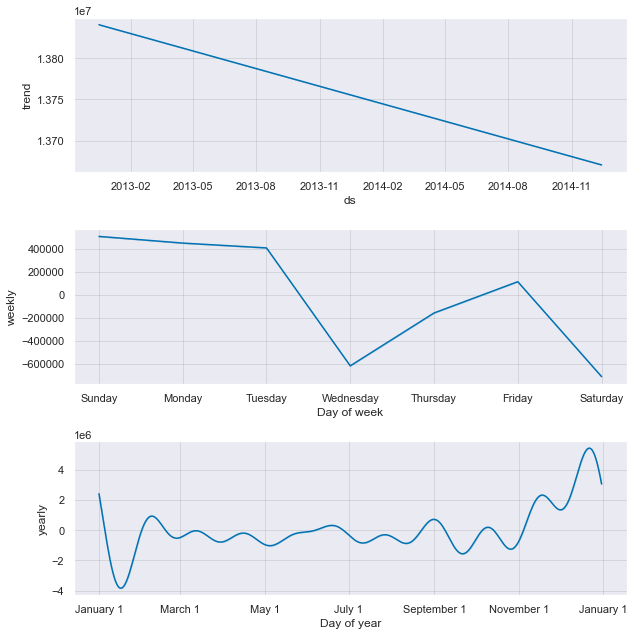

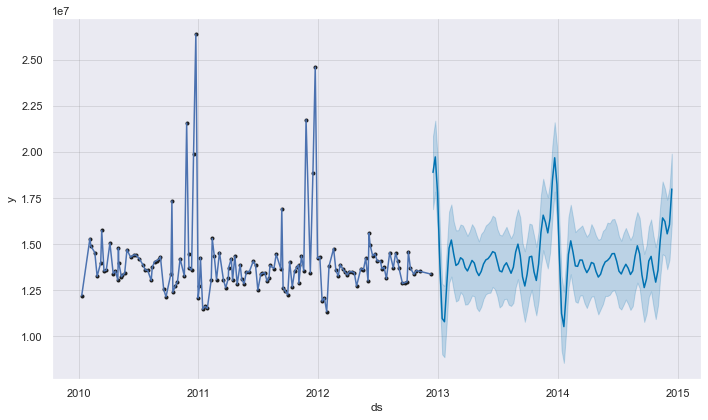

In [26]:
forecast_model('B')

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Models for Store:  C 



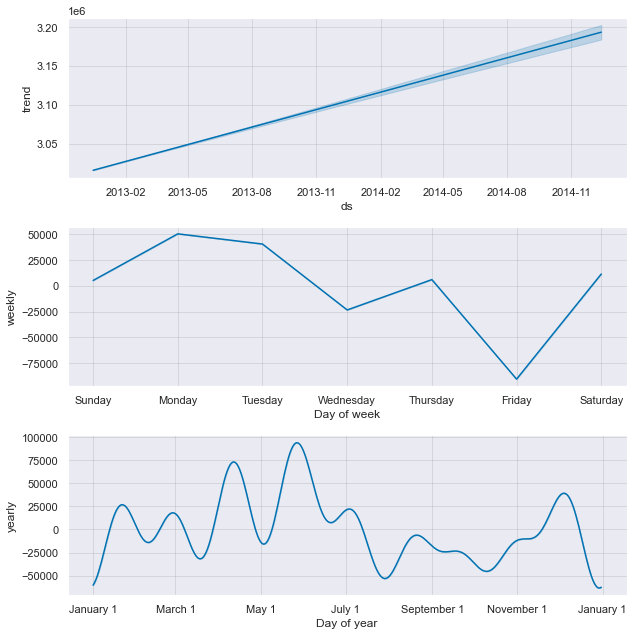

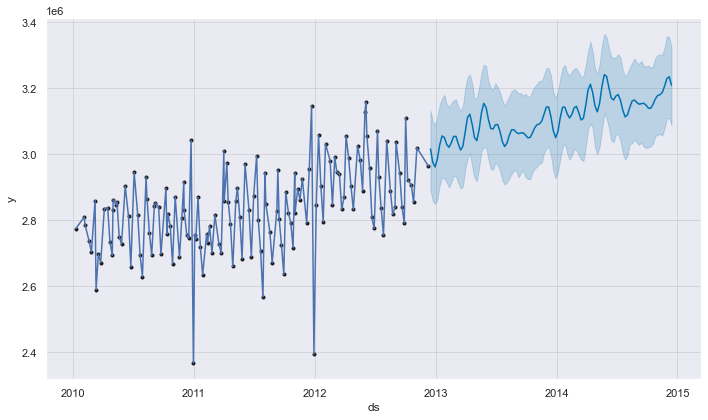

In [27]:
forecast_model('C')

***

## Conclusion
> The stores have different forcasts based on type. It would likely even be advisable for store managers to use models specified for their store, but creating and analysing 45 different models is out of scope of this notebook. Store types A and B should be more prepared for increased sales on the holidays followed by sharp declines in January. 'C' stores should expect sales to increase in general in 2014 and 2015 more sharply than other types. Interestingly, C stores have a spike in customers on Saturday and A dip on Friday, where as A/B stores have the opposite. This could be due to the store types being closed on these days.